In [9]:
# vivarium imports
from vivarium.core.engine import Engine
from vivarium.plots.topology import plot_topology

# vivarium-comets imports
from processes.temperature_field import TemperatureField
from plots.field import plot_fields_temporal_to_gif

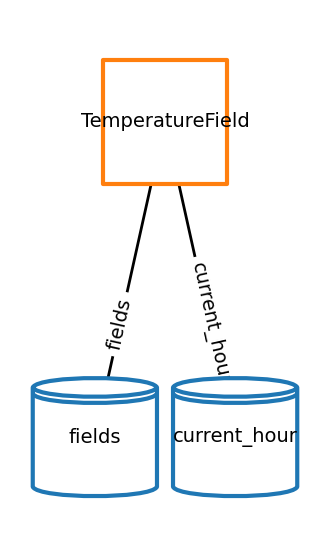

In [10]:
temperature_field = TemperatureField({})
fig = plot_topology(temperature_field)

In [13]:
# Temperature simulation function
def temperature_field (config, total_time):
    # create the process and make a simulation
    temperature_field = TemperatureField (config)
    initial_state = temperature_field.initial_state()

    sim = Engine(
        initial_state=initial_state,
        processes={'temperature_process': temperature_field},
        topology={'temperature_process': {
            'fields': ('fields',),
            'current_hour': ('current_hour',), 
        }}
    )
    # Run the simulation
    sim.update(total_time)
    
    # Get the results
    data = sim.emitter.get_timeseries()
    
    return data

In [14]:
total_time = 120
config = {
    'surface_temperature': 25.0,  # Surface temperature in degrees Celsius
    'gradient': 0.03,  # Temperature gradient in degrees Celsius per meter
    'bounds': [10, 4],  # Grid bounds (width, height)
    'nbins': [10, 4],  # Number of bins in the grid (rows, columns)
    'start_hour': 0,  # Starting hour of the simulation
    }


# run a simulation
data = temperature_field(config, total_time)


Simulation ID: 64ce551e-5284-11ef-b22d-ba21c95c07d9
Created: 08/04/2024 at 13:10:05
Completed in 0.008668 seconds


In [20]:
#data['fields']['temperature'][]


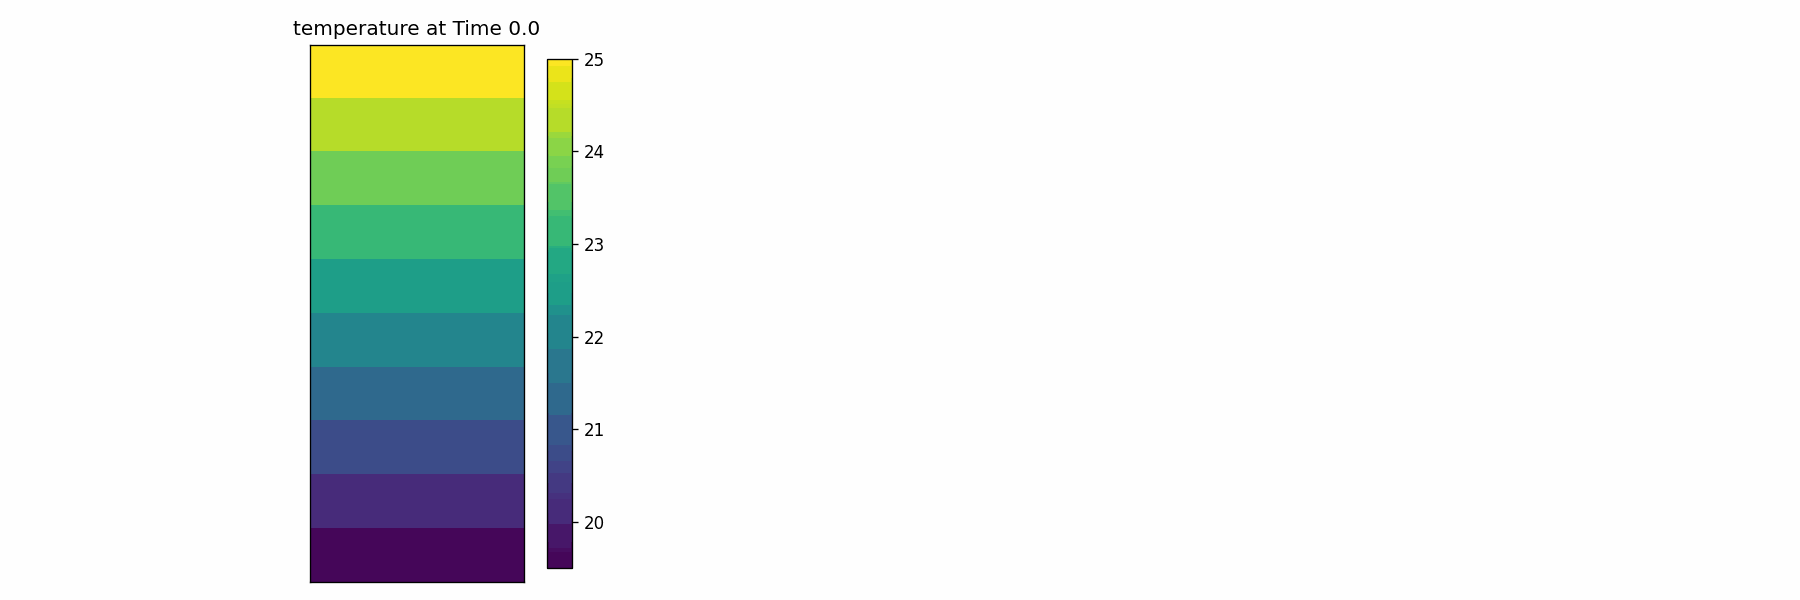

In [19]:
plot_fields_temporal_to_gif(
    fields_data=data['fields'],
    species_data={},  # Empty dictionary as there's no species data
    plot_fields=['temperature'],
    plot_species=[],  # No species to plot
    desired_time_points=desired_time_list,
    actual_time_points=actual_time_list,
    filename='temp_over_time.gif'
)